# loading municipal data and libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# Load XML file into a pandas DataFrame
df = pd.read_xml('D:\Roles_Donnees_Ouvertes_2024\RL66023_2024.xml')  # Replace 'your_file.xml' with the path to your XML file

# Display the DataFrame

C:\Users\xuebi\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import MultiPolygon
import folium
from folium.plugins import HeatMap
import pandas as pd
import numpy as np 
import seaborn as sns
from shapely.geometry import Point


In [3]:
municiaplity_data = pd.read_csv("MUN.csv")
municiaplity_data["mcode"] = municiaplity_data["mcode"].astype(str)
top_quebec = municiaplity_data.sort_values(by='mpopul', ascending=False)[:100]

In [4]:
for index, row in top_quebec.iterrows():
    munid = row["mcode"]
    if munid == "66023":
        pass
    else:
        print(munid)
        new_df = pd.read_xml(f'D:\Roles_Donnees_Ouvertes_2024\RL{"0" * (5-len(munid))}{munid}_2024.xml')  # Replace 'your_file.xml' with the path to your XML file
        df = pd.concat([df,new_df])


23027
65005
81017
58227
43027
25213
94068
37067
64008
56083
58007
60013
49058
75017
47017
74005
73015
54048
64015
67050
36033
66142
10043
39062
72005
71083
70052
86042
58033
66058
53052
66097
29073
89008
57005
67035
93042
59010
73005
45072
67015
73010
31084
58037
63048
57040
97007
60028
67020
58012
71105
61025
66072
59020
72015
96020
23072
12072
66087
66032
66102
57035
66107
75028
75005
72010
67030
23057
57020
46080
61035
73035
52007
67045
3005
71070
76020
77022
70022
79088
38010
8053
73020
82015
75040
59015
92022
26030
88055
1023
57010
62037
82020
63060
77043
46078
55048
78032
71065


In [5]:
df

,VERSION,RLM01A,RLM02A,RL0101,RL0102A,RL0104,RL0105A,RL0106A,RL0107A,RL0201,...,RL0312A,RL0304A,RL0507,RL0305A,RL0314A,RL0503A,RL0315A,RL0316A,RL0506Ax,RL0506Bx
0,2.7,NaN,NaN,None,None,None,NaN,None,NaN,None,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,66023.0,NaN,None,None,None,NaN,None,NaN,None,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2023.0,None,None,None,NaN,None,NaN,None,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,\n,REM19,\n,1000.0,30-F14000200,2038.0,\n,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,\n,REM19,\n,6000.0,30-F17000600,2078.0,\n,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5053,NaN,NaN,NaN,\n,NaN,\n,1000.0,NaN,1462.0,\n,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5054,NaN,NaN,NaN,\n,NaN,\n,1100.0,NaN,1462.0,\n,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5055,NaN,NaN,NaN,\n,NaN,\n,9100.0,NaN,1462.0,\n,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5056,NaN,NaN,NaN,\n,NaN,\n,1000.0,NaN,1462.0,\n,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# analyse de surface totale, building commerciaux

In [20]:
df['RL0105A'] = df['RL0105A'].astype(str)

In [40]:
superficie_BC = df[(df['RL0105A'].str.startswith('5001')) & (df['RL0308A'] != "NaN")]

In [41]:
superficie_BC['RL0308A'].max()

139764.1

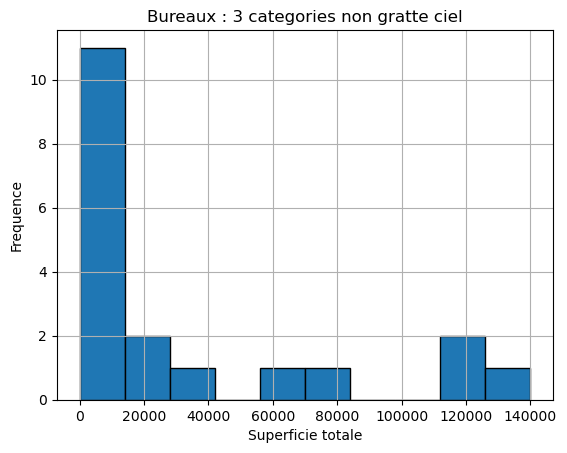

In [42]:
superficie_BC['RL0308A'].hist(bins=10, range = (0,140000), edgecolor='black')
plt.title('Bureaux : 3 categories non gratte ciel')  # Set the title of the histogram
plt.xlabel('Superficie totale')  # Optionally, add x-axis label
plt.ylabel('Frequence')  # Optionally, add y-axis label
plt.show()

### Categorie non-gratte_ciel

In [43]:
q1 = superficie_BC['RL0308A'].quantile(0.25)  # 25th percentile
q2 = superficie_BC['RL0308A'].quantile(0.50)  # 25th percentile
q3 = superficie_BC['RL0308A'].quantile(0.75)  # 25th percentile

print("Q1 (25th percentile):", q1)
print("Q2 (50th percentile / Median):", q2)
print("Q2 (75th percentile):", q3)
print("Mean:", superficie['RL0308A'].mean())


Q1 (25th percentile): 2337.6499999999996
Q2 (50th percentile / Median): 7904.7
Q2 (75th percentile): 49153.6
Mean: 33563.98947368421


In [17]:
"""
data = [
superficie[superficie['RL0308A'] < q1]['RL0308A'].values,
superficie[(superficie['RL0308A'] < q2) & (superficie['RL0308A'] > q1)]['RL0308A'].values,
superficie[(superficie['RL0308A'] < 60000) & (superficie['RL0308A'] > 3038.6)]['RL0308A'].values,
]

plt.boxplot(data)
plt.yscale('log')
plt.xticks([1, 2, 3], ["Petit", "Moyen", "Grand"])
# Display the plot
plt.title("Aire totale pour les categories non gratte-ciel")
plt.ylabel("Values")
plt.show()
"""

## Analyse annee de construction 

In [46]:
anne_construction_BC = df[(df['RL0105A'].str.startswith('5001')) & (df['RL0307A'] != "NaN")]

<Axes: >

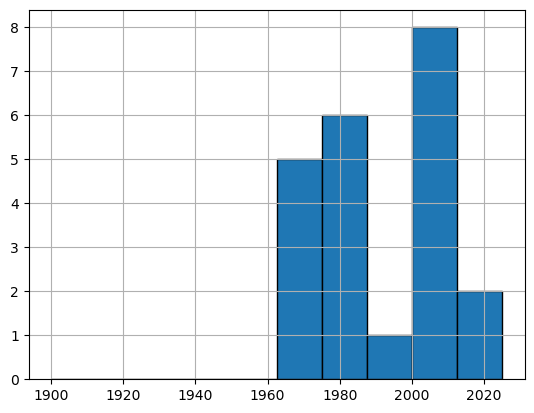

In [47]:
anne_construction_BC['RL0307A'].hist(bins=10,range = (1900,2025), edgecolor='black')

In [48]:
q1 = anne_construction_BC['RL0307A'].quantile(0.25)  # 25th percentile
q2 = anne_construction_BC['RL0307A'].quantile(0.50)  # 25th percentile
print("Q1 (25th percentile):", q1)
print("Q2 (50th percentile / Median):", q2)

"""
data = [
anne_construction[(anne_construction['RL0307A'] > 1900.0) & (anne_construction['RL0307A'] < 1963)]['RL0307A'].values,
anne_construction[(anne_construction['RL0307A'] < 1989.0) & (anne_construction['RL0307A'] > 1963)]['RL0307A'].values,
anne_construction[anne_construction['RL0307A'] > 1989.0]['RL0307A'].values,
]

plt.boxplot(data)
plt.xticks([1, 2, 3], ["<1963", "1963 - 1989", ">1989"])
# Display the plot
plt.title("Periode de construction pour les categories non gratte-ciel")
plt.ylabel("Values")
plt.show()
"""

Q1 (25th percentile): 1975.25
Q2 (50th percentile / Median): 1984.5


'\ndata = [\nanne_construction[(anne_construction[\'RL0307A\'] > 1900.0) & (anne_construction[\'RL0307A\'] < 1963)][\'RL0307A\'].values,\nanne_construction[(anne_construction[\'RL0307A\'] < 1989.0) & (anne_construction[\'RL0307A\'] > 1963)][\'RL0307A\'].values,\nanne_construction[anne_construction[\'RL0307A\'] > 1989.0][\'RL0307A\'].values,\n]\n\nplt.boxplot(data)\nplt.xticks([1, 2, 3], ["<1963", "1963 - 1989", ">1989"])\n# Display the plot\nplt.title("Periode de construction pour les categories non gratte-ciel")\nplt.ylabel("Values")\nplt.show()\n'

## Analyse floors 

In [49]:
floors_BC = df[(df['RL0105A'].str.startswith('5001')) & (df['RL0306A'] != "NaN")]

<Axes: >

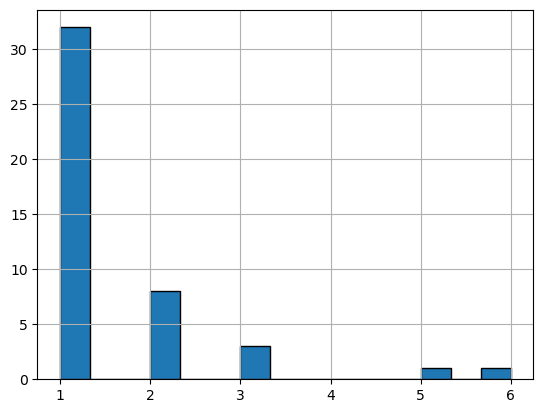

In [50]:
floors_BC['RL0306A'].hist(bins=15, edgecolor='black')

In [26]:
"""
data = [
superficie[superficie['RL0308A'] < q1]['RL0306A'].dropna().values,
superficie[(superficie['RL0308A'] < q2) & (superficie['RL0308A'] > q1)]['RL0306A'].dropna().values,
superficie[(superficie['RL0308A'] < 40000) & (superficie['RL0308A'] > q2)]['RL0306A'].dropna().values,
]
plt.boxplot(data,showfliers=False)
plt.xticks([1, 2, 3], ["Petit", "Moyen", "Grand"])
# Display the plot
plt.title("Nombre d'etages totale pour les categories non gratte-ciel")
plt.ylabel("Nombre d'etages totale")
plt.show()
"""

# analyse de surface totale, cg

In [97]:
superficie_cg = df[(df['RL0105A'].str.startswith('51')) & (df['RL0308A'] != "NaN") & ~(df['RL0105A'].str.startswith('50'))]

In [98]:
superficie_cg.shape
superficie_BC['RL0308A'].max()

57719.0

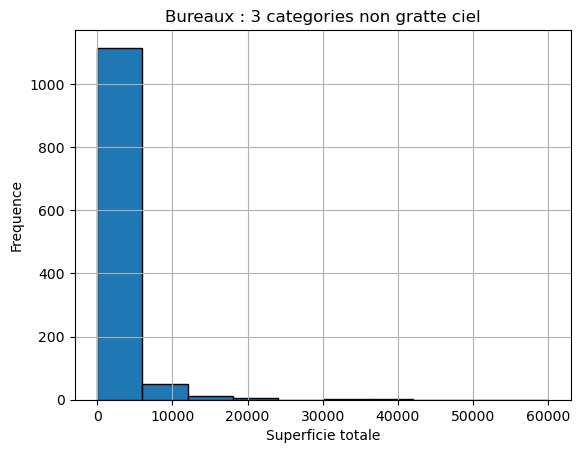

In [106]:
superficie_cg['RL0308A'].hist(bins=10, range = (0,60000), edgecolor='black')
plt.title('Bureaux : 3 categories non gratte ciel')  # Set the title of the histogram
plt.xlabel('Superficie totale')  # Optionally, add x-axis label
plt.ylabel('Frequence')  # Optionally, add y-axis label
plt.show()

In [102]:
q1 = superficie_cg['RL0308A'].quantile(0.25)  # 25th percentile
q2 = superficie_cg['RL0308A'].quantile(0.50)  # 25th percentile
q3 = superficie_cg['RL0308A'].quantile(0.75)  # 25th percentile

print("Q1 (25th percentile):", q1)
print("Q2 (50th percentile / Median):", q2)
print("Q2 (75th percentile):", q3)
print("Mean:", superficie_cg['RL0308A'].mean())


Q1 (25th percentile): 367.375
Q2 (50th percentile / Median): 851.75
Q2 (75th percentile): 1989.425
Mean: 1769.6775803722508


<Axes: >

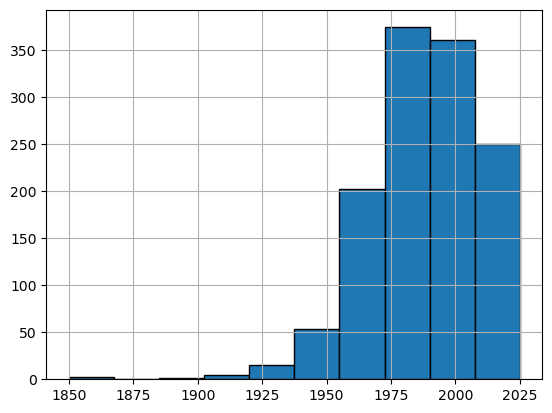

In [103]:
superficie_cg['RL0307A'].hist(bins=10,range = (1850,2025), edgecolor='black')

<Axes: >

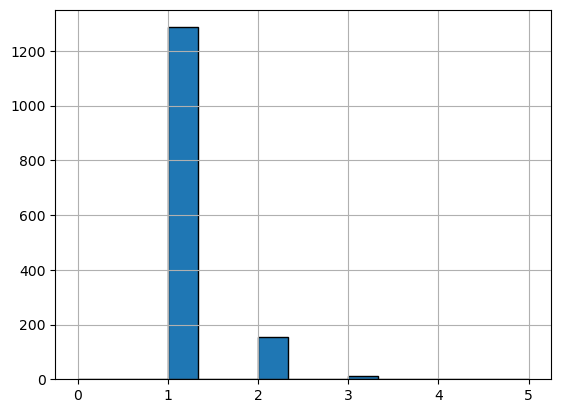

In [104]:
superficie_cg['RL0306A'].hist(bins=15,range = (0,5), edgecolor='black')

## BI-ANALYSE Analyse floors - SUPERFICIE

In [28]:
superficie = df[(df['RL0105A'].str.startswith('5')) & (df['RL0302A'] != "NaN") & (df['RL0307A'] != "NaN")]


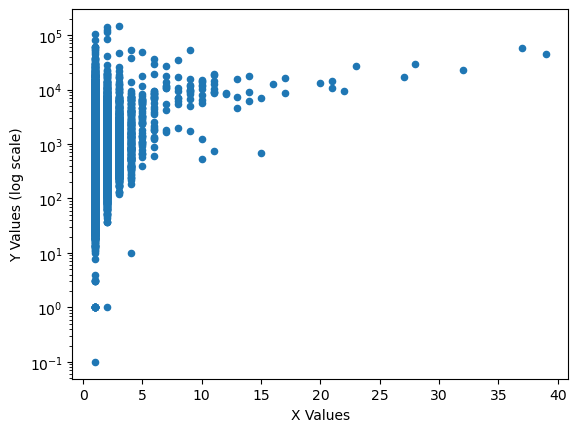

In [29]:
ax = superficie.plot.scatter(x='RL0306A', y='RL0308A')

# Set y-axis to logarithmic scale
ax.set_yscale('log')
# ax.set_xscale('log')


# Add labels
ax.set_xlabel("X Values")
ax.set_ylabel("Y Values (log scale)")

# Show plot
plt.show()